<span style="font-size:30px; font-family:'Times new roman';">
Import Data 🎒
</span>

In [118]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sys.path.append('../src')
from greeks import greeks
from IPython.display import display

In [119]:
nvda = pd.read_csv("../data/cleanedNVDA.csv")
spy = pd.read_csv("../data/cleanedSPY.csv")

expiry = nvda["expiry"].unique()[0]

<span style="font-size:30px; font-family:'Times new roman';">
Calculation 🧮
</span>

In [140]:
def calculateGreeks(data):
    outputGreeks = []

    for _, row in data.iterrows():
        greek = greeks(
            S=row['spot'],
            K=row['strike'],
            T=row['ttm'],
            sigma=row['impliedVolatility'],
            q=row['dividendYield'],
            ot=row['type']
        )
        greek['strike'] = row['strike']
        greek['type'] = row['type']
        greek['spot'] = row['spot']
        outputGreeks.append(greek)

    dfnvda = pd.DataFrame(outputGreeks)

In [141]:
calculateGreeks(nvda)
calculateGreeks(spy)
display(dfnvda)
display(dfspy)

,delta,gamma,theta,vega,modelPrice,strike,type,spot
0,0.918359,7.105427e-11,-132.728226,1.501102,20.175332,75.0,call,94.309998
1,0.837023,-3.375078e-10,-153.875788,2.382777,15.504631,80.0,call,94.309998
2,0.779861,5.329071e-11,-191.320351,2.923950,11.115180,85.0,call,94.309998
3,0.642827,2.664535e-11,-226.374968,3.677490,7.338772,90.0,call,94.309998
4,0.482437,3.344264e-05,-205.442077,3.935478,3.888335,95.0,call,94.309998
...,...,...,...,...,...,...,...,...
282,-0.799241,8.881784e-11,-20.997893,6.881629,10.799248,104.0,put,94.309998
283,-0.795957,1.227271e-03,-25.280785,7.157577,12.200106,105.0,put,94.309998
284,-0.893641,6.289691e-04,-11.633992,4.920899,12.181236,106.0,put,94.309998
285,-0.893788,1.452539e-03,-11.989825,4.463186,13.139428,107.0,put,94.309998


,delta,gamma,theta,vega,modelPrice,strike,type,spot
0,1.000000,0.000000e+00,0.000000,0.000000,130.279999,375.0,call,505.279999
1,1.000000,0.000000e+00,0.000000,0.000000,55.279999,450.0,call,505.279999
2,0.600993,-8.881784e-11,-367.467127,19.453125,15.836325,495.0,call,505.279999
3,0.518828,1.009726e-03,-383.813656,20.306453,12.657335,500.0,call,505.279999
4,0.487360,-1.065814e-10,-381.905036,20.274630,9.860638,505.0,call,505.279999
...,...,...,...,...,...,...,...,...
854,-0.913093,-2.842171e-10,-569.056077,1.530610,110.460913,575.0,put,505.279999
855,-0.909463,1.421085e-10,-569.881222,2.071722,114.472233,579.0,put,505.279999
856,-0.912610,-2.842171e-10,-569.146617,1.510020,115.452436,580.0,put,505.279999
857,-0.907416,0.000000e+00,-570.970448,3.130287,117.536885,582.0,put,505.279999


<span style="font-size:30px; font-family:'Times new roman';">
Explore Data 👀
</span>

In [134]:
def plotTheGreeks(data, lebel):
    # delta vs strike
    spot = data.iloc[0, 7]
    plt.figure(figsize=(7.5, 4.5))
    sns.lineplot(data=data, x='strike', y='delta', hue='type')
    plt.title('Delta vs Strike ' + lebel)
    plt.axhline(0, linestyle='--', color='gray')
    plt.axvline(spot, linestyle='--', color='gray', label='Spot Price')
    plt.axvspan(spot * 0.95, spot * 1.05, color='gray', alpha=0.2, label='ATM Range')
    plt.grid()
    plt.show()

    # gamma vs strike
    plt.figure(figsize=(7.5, 4.5))
    sns.lineplot(data=data, x='strike', y='gamma', hue='type')
    plt.axvline(spot, linestyle='--', color='gray', label='spot price')
    plt.axvspan(spot * 0.95, spot * 1.05, color='gray', alpha=0.2, label='atm range')
    plt.title('Gamma vs Strike ' + lebel)
    plt.grid()
    plt.show()

    # theta vs strike
    plt.figure(figsize=(10,5))
    sns.lineplot(data=data, x='strike', y='theta', hue='type')
    plt.axvline(spot, linestyle='--', color='gray', label='spot price')
    plt.axvspan(spot * 0.95, spot * 1.05, color='gray', alpha=0.2, label='atm range')
    plt.title('Theta vs Strike ' + lebel)
    plt.axhline(0, linestyle='--', color='gray')
    plt.grid()
    plt.show()

    # vega vs strike
    plt.figure(figsize=(7.5, 4.5))
    sns.lineplot(data=data, x='strike', y='vega', hue='type')
    plt.axvline(spot, linestyle='--', color='gray', label='spot price')
    plt.axvspan(spot * 0.95, spot * 1.05, color='gray', alpha=0.2, label='atm range')
    plt.title('Vega vs Strike ' + lebel)
    plt.grid()
    plt.show()

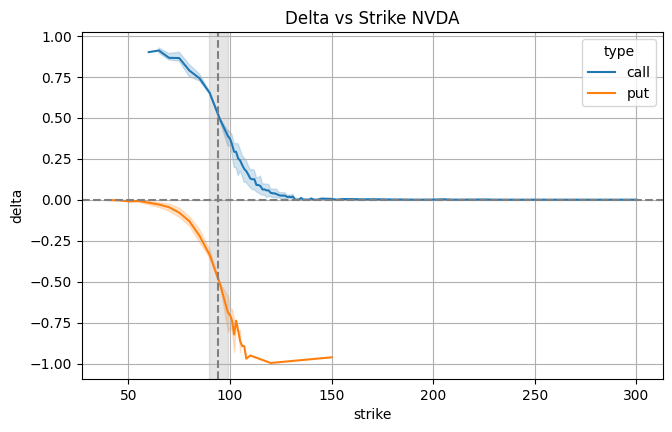

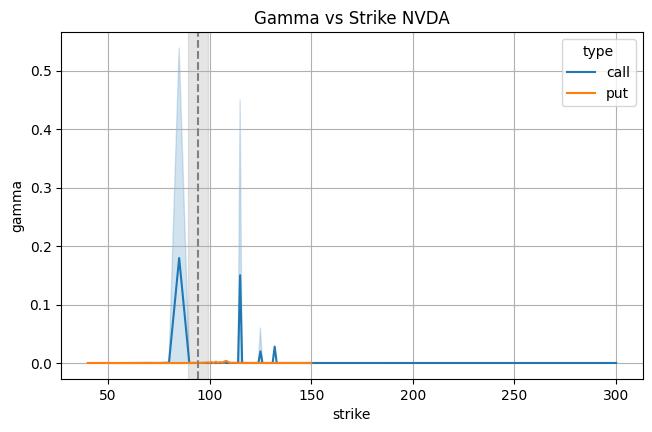

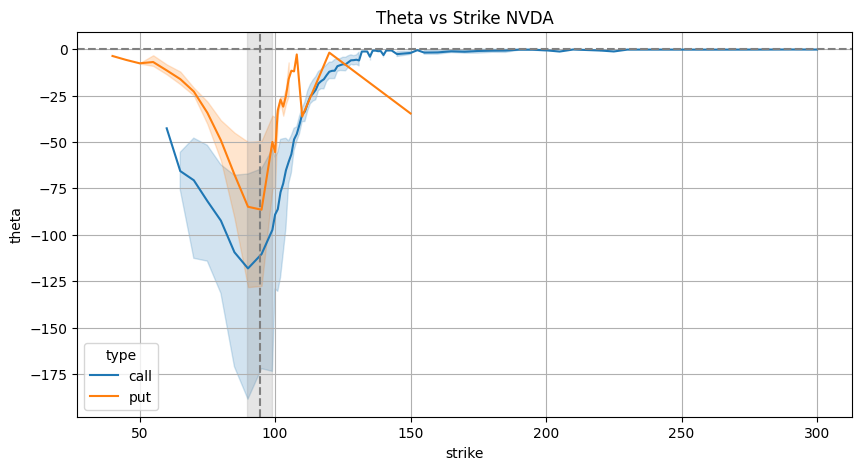

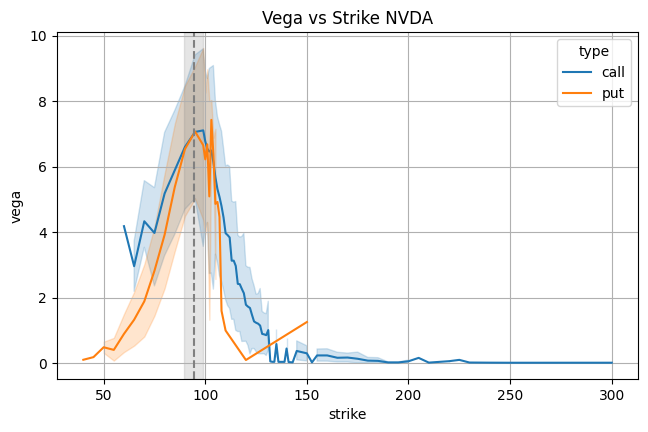

In [135]:
plotTheGreeks(dfnvda, "NVDA")

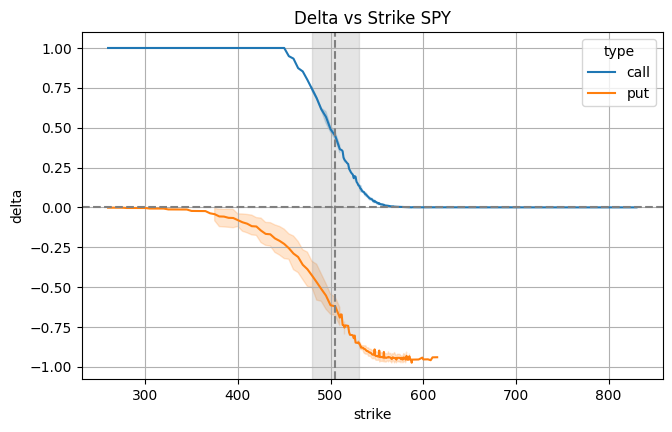

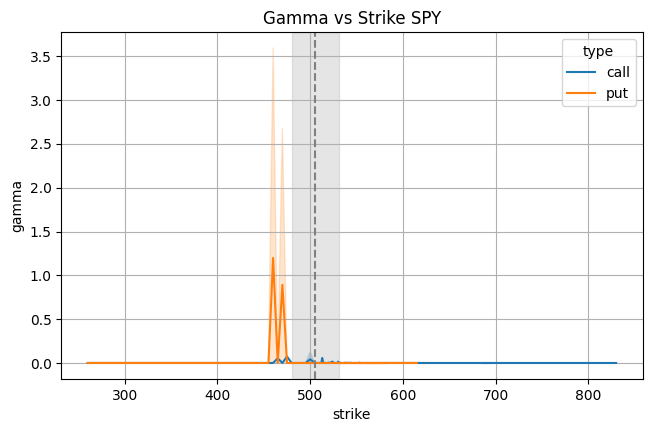

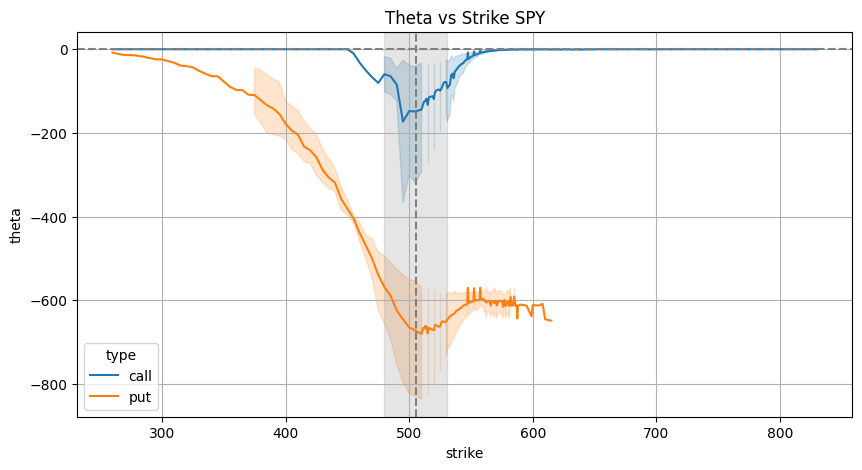

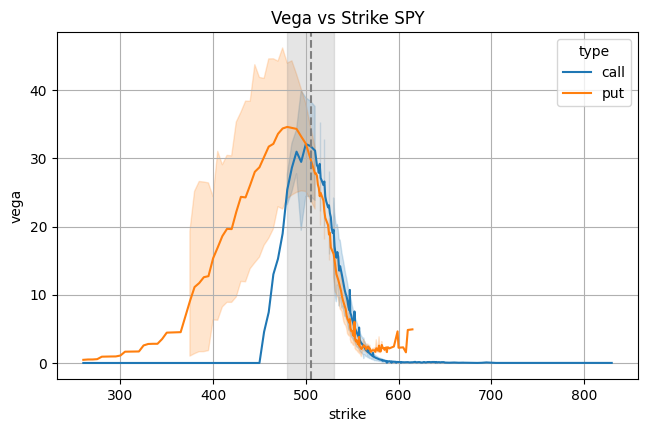

In [142]:
plotTheGreeks(dfspy, "SPY")

<span style="font-size:15px; font-family:'Times new roman';">
Delta:	~0.5 near ATM (calls), -0.5 for puts<br>
Gamma:	Sharp peak at ATM (highest sensitivity to delta change)<br>
Theta:	Most negative near ATM (high time decay)<br>
Vega:	Peak around ATM — most sensitive to volatility
</span>

<span style="font-size:15px; font-family:'Times new roman';">
It seem like i have problems with the visualize of gamma both nvda and spy 🤯<br>
these factors might skew gamma shape<br>
 - implied volatility skew(smile) --> which is actually smile (can look at the prepareData.ipynb)<br>
 - Spare or noisy options chains: might have strike near the spot or lower volume contracts<br>
 - problem of american-style options(exercise early): early exercise gonnna make gamma not exactly peak at ATM
</span>

In [136]:
# Let's confirm the gamma plot focus on +-10% at the spot price
def gammaFocus(data, label):
    spot = data['spot'].iloc[0]
    plt.figure(figsize=(7.5, 4.5))
    sns.lineplot(
        data=data[(data['strike'] > spot * 0.9) & (data['strike'] < spot * 1.1)],
        x="strike", y="gamma", style="type", hue="type", palette={'call': 'tab:blue', 'put': 'orange'}
    )
    plt.title(f"Gamma vs Strike (Focused Near ATM) {label}")
    plt.axvline(spot, color='gray', linestyle='--', label="Spot")
    plt.axvspan(spot * 0.95, spot * 1.05, alpha=0.1, color="gray", label="ATM Range")
    plt.xlabel("strike")
    plt.ylabel("gamma")
    plt.grid()
    plt.legend()
    plt.show()
    print(spot)

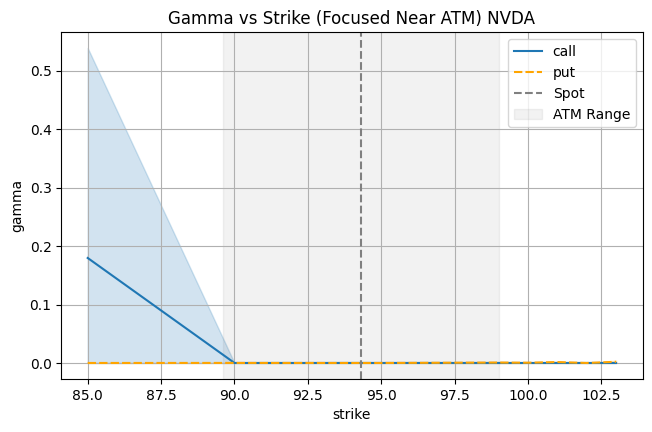

94.30999755859376


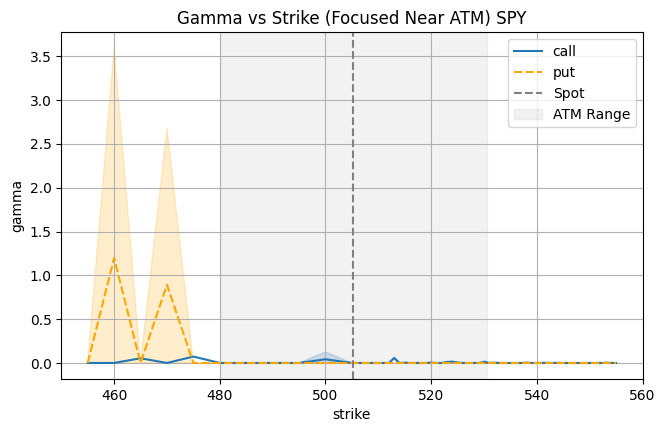

505.2799987792969


In [143]:
gammaFocus(dfnvda, "NVDA")
gammaFocus(dfspy, "SPY")

<span style="font-size:15px; font-family:'Times new roman';">
Why Gamma not near ATM price<br>
Data artifact: high implied vol or low time-to-maturity skewing sensitivity<br>
Data set might not have enough strikes near the ATM or incorrectly marked types (e.g., many "calls" but few “puts”)<br>
but the bigest problem is many impliedVolatility value < 0.05 which is unrealistically low --> need to filter out, also i think N = 500 in binomial is quite too much so i reduced it to 100
</span>

In [144]:
nvdaFilter = nvda[nvda['impliedVolatility'] > 0.05].copy()
spyFilter = spy[spy['impliedVolatility'] > 0.05].copy()

In [145]:
calculateGreeks(nvdaFilter)
calculateGreeks(spyFilter)

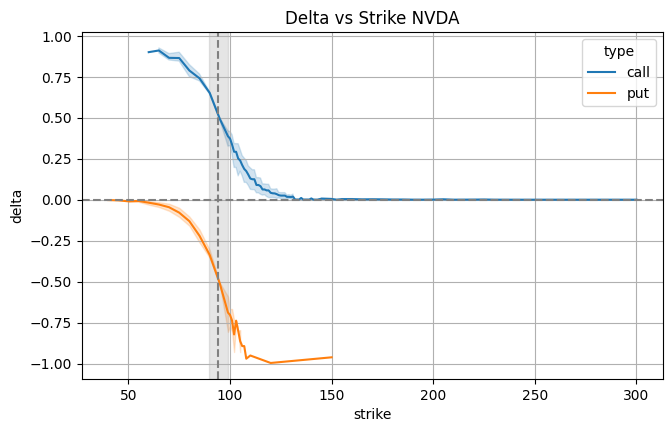

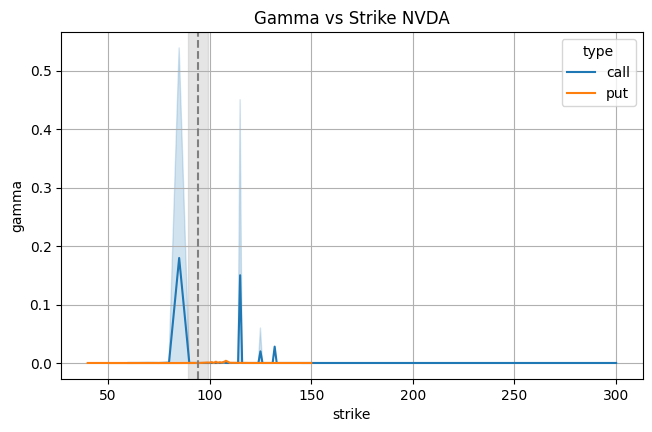

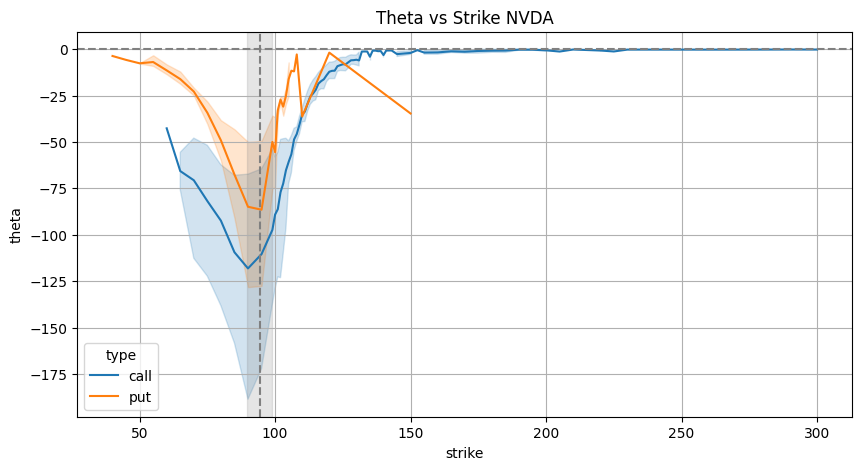

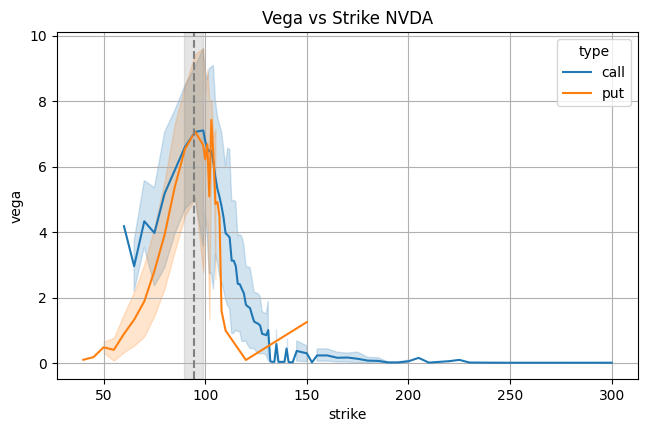

In [146]:
plotTheGreeks(dfnvda, "NVDA")

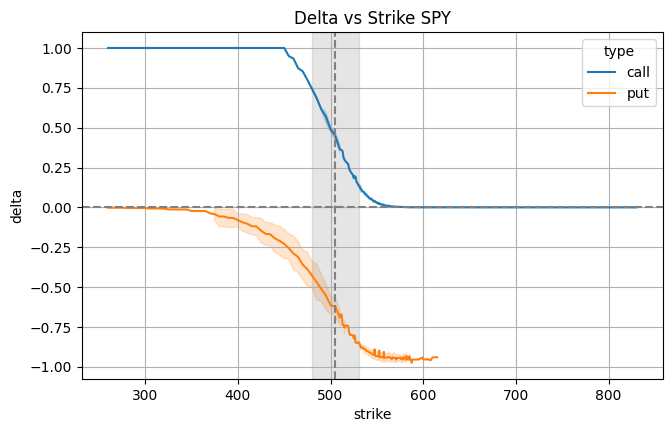

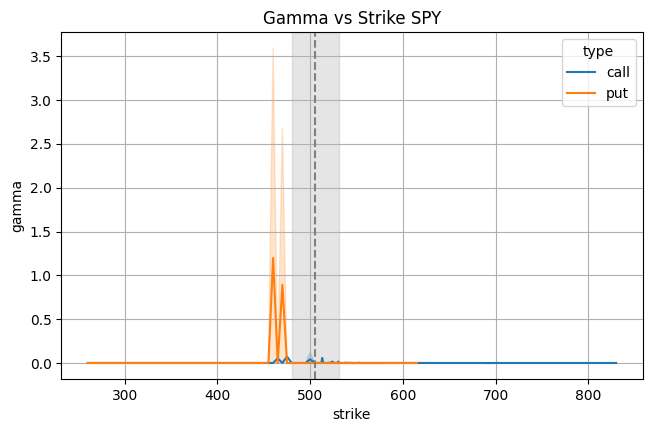

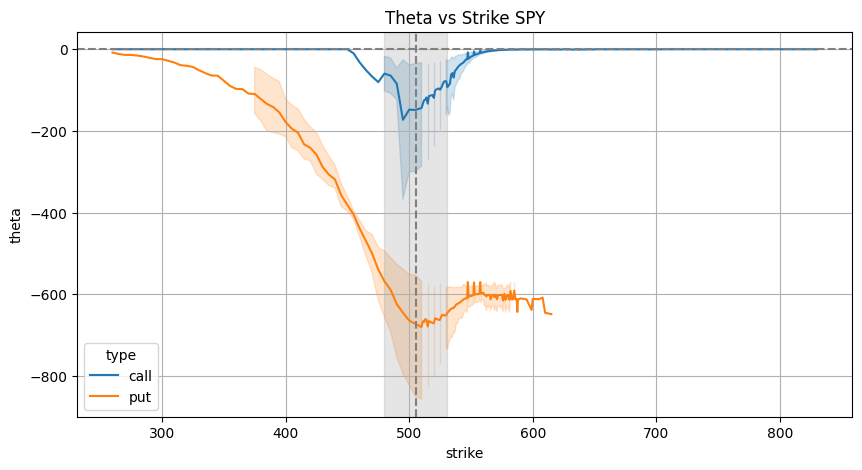

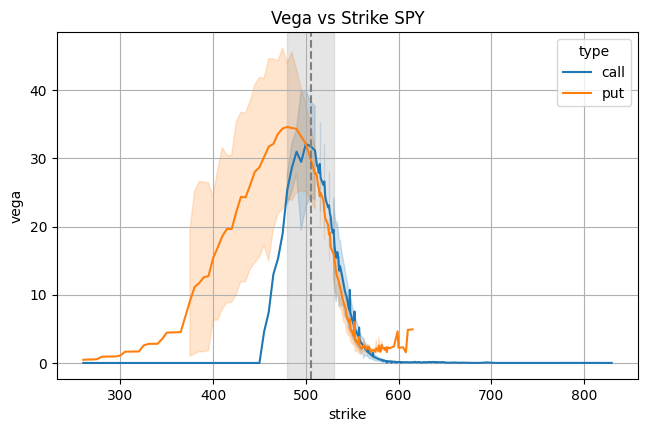

In [147]:
plotTheGreeks(dfspy, "SPY")